# Task 1

In [2]:
import pandas as pd

# Read the breast-cancer-wisconsin.xlsx file
df_cancer = pd.read_excel('breast-cancer-wisconsin.xlsx')

# drop rows with missing values
df_cancer = df_cancer.dropna()

df_cancer.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


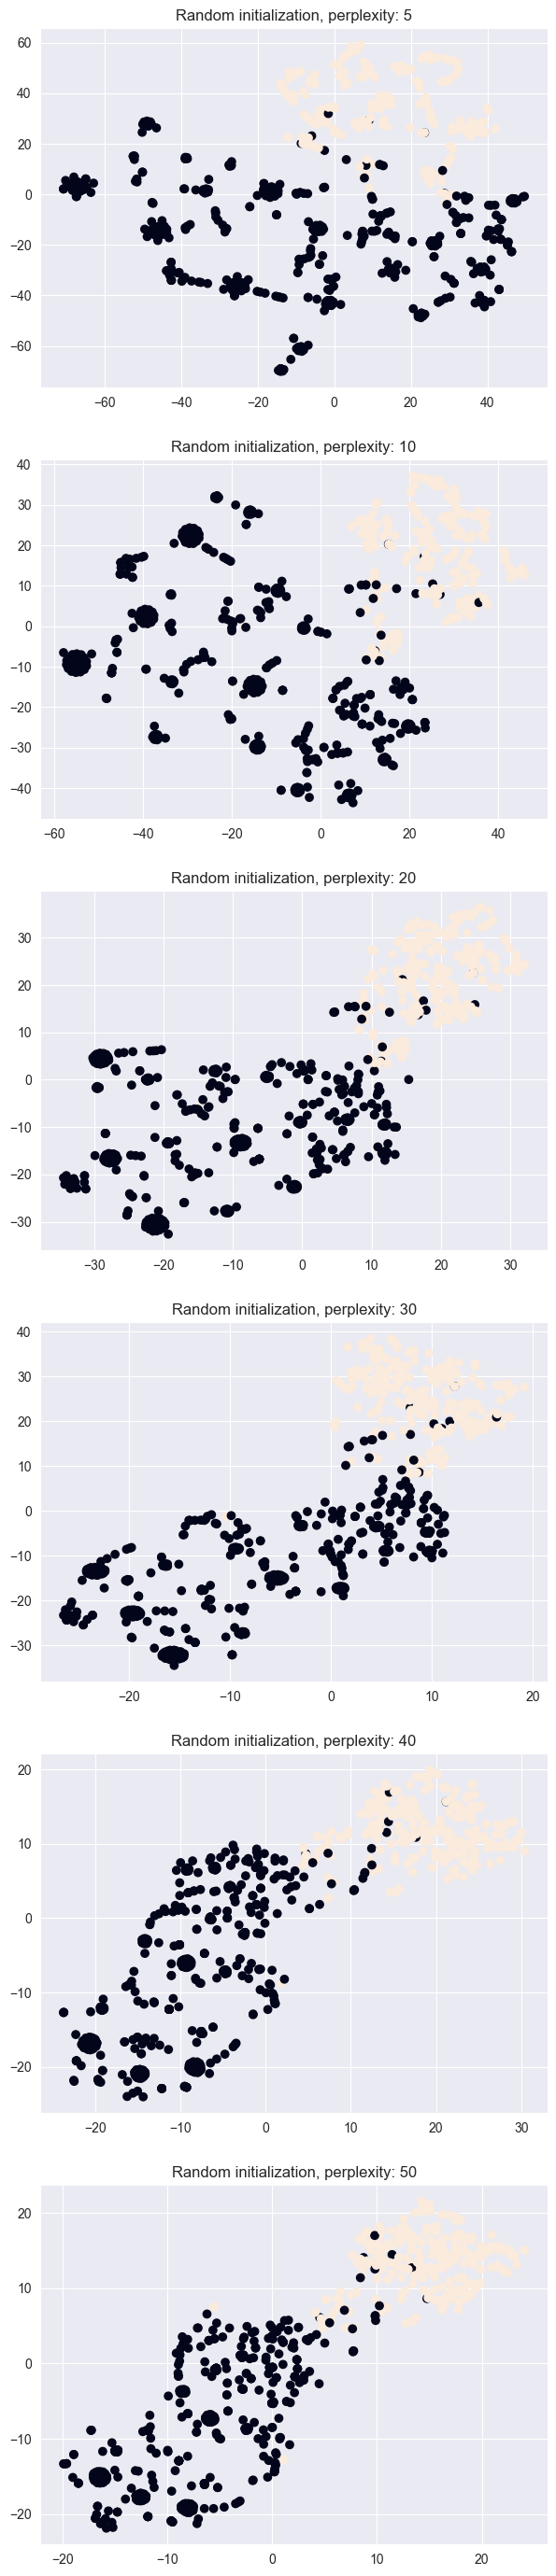

In [15]:
# Run t-SNE with a random initial distribution of points and perplexity 5. Visualize the 2D data set in a scatter plot using different colors for cases from benign and malignant classes
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [ 5, 10, 20, 30, 40, 50]
fig, ax = plt.subplots(len(perplexities), figsize=(7, 35))

for i, perplexity in enumerate(perplexities):
    # Create a TSNE instance: model
    model = TSNE(perplexity=perplexity, init='random', random_state=0)

    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(df_cancer.drop(['class', 'code'], axis=1))

    # Visualize the 2D data set in a scatter plot using different colors for cases from benign and malignant classes
    ax[i].scatter(tsne_features[:,0], tsne_features[:,1], c=df_cancer['class'])
    ax[i].set_title('Random initialization, perplexity: {}'.format(perplexity))

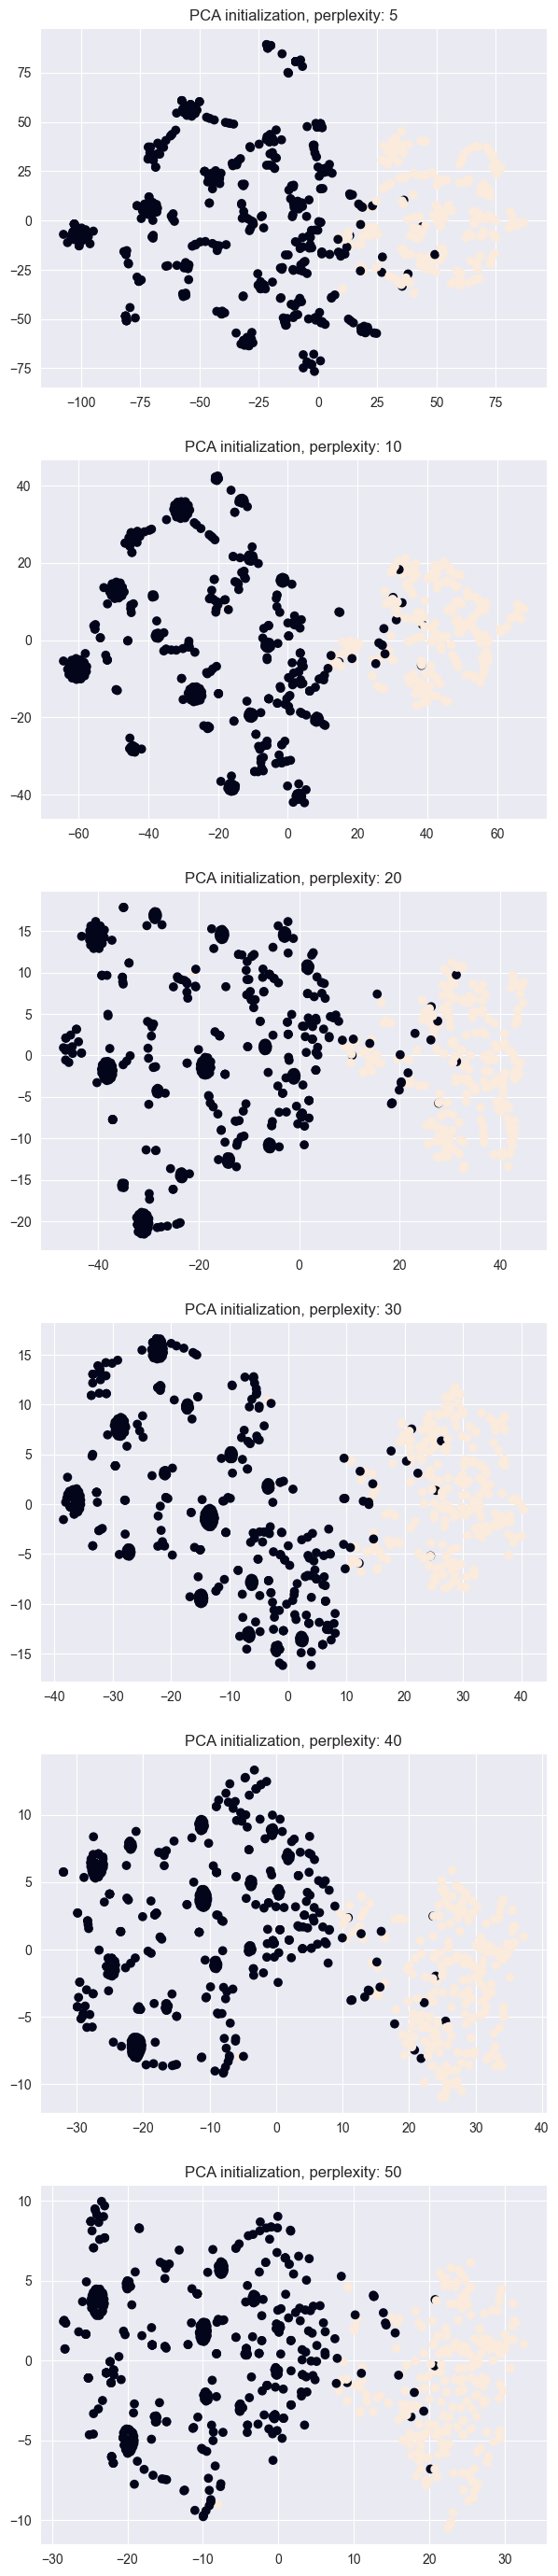

In [16]:
fig, ax = plt.subplots(len(perplexities), figsize=(7, 35))

for i, perplexity in enumerate(perplexities):
    # Create a TSNE instance: model
    model = TSNE(perplexity=perplexity, init='pca', random_state=0)

    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(df_cancer.drop(['class', 'code'], axis=1))

    # Visualize the 2D data set in a scatter plot using different colors for cases from benign and malignant classes
    ax[i].scatter(tsne_features[:,0], tsne_features[:,1], c=df_cancer['class'])
    ax[i].set_title('PCA initialization, perplexity: {}'.format(perplexity))

The 2d scatter plot with perplexity 5, 20, 40 and random initialization shows good separation between the two classes. Also, the plots with perplexity 5, 40, 50 and PCA initialization shows good separation between the two classes. The plots with random initialization and perplexity 10, and with PCA initialization and perplexity 30 show some overlap between the two classes. The results depend both on perplexity and initialization, because the results of t-SNE generally depend on many parameters and it is difficult to predict how the results will look like.

In [21]:
df_nuclear = pd.read_excel('Data_Cortex_Nuclear.xls')
df_nuclear.dropna(inplace=True)
df_nuclear.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m


In [32]:
df_nuclear_subset = df_nuclear[(df_nuclear['class'] == 'c-CS-m') | (df_nuclear['class'] == 't-SC-s')].drop(['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis=1).copy()

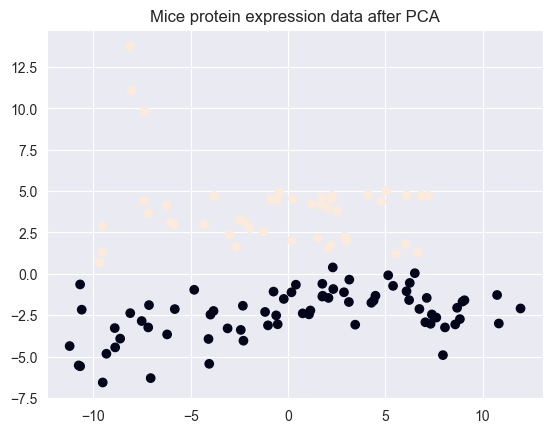

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_nuclear_subset_scaled = scaler.fit_transform(df_nuclear_subset.drop('class', axis=1))

# using PCA to reduce the dimensionality of the data to 2
pca = PCA(n_components=2)
df_nuclear_subset_pca = pca.fit_transform(df_nuclear_subset_scaled)

# Visualize the 2D data set in a scatter plot using different colors for instances from each class
plt.scatter(df_nuclear_subset_pca[:,0], df_nuclear_subset_pca[:,1],
            c=df_nuclear_subset['class'] == 'c-CS-m',
            )
plt.title('Mice protein expression data after PCA')
plt.show()

c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the

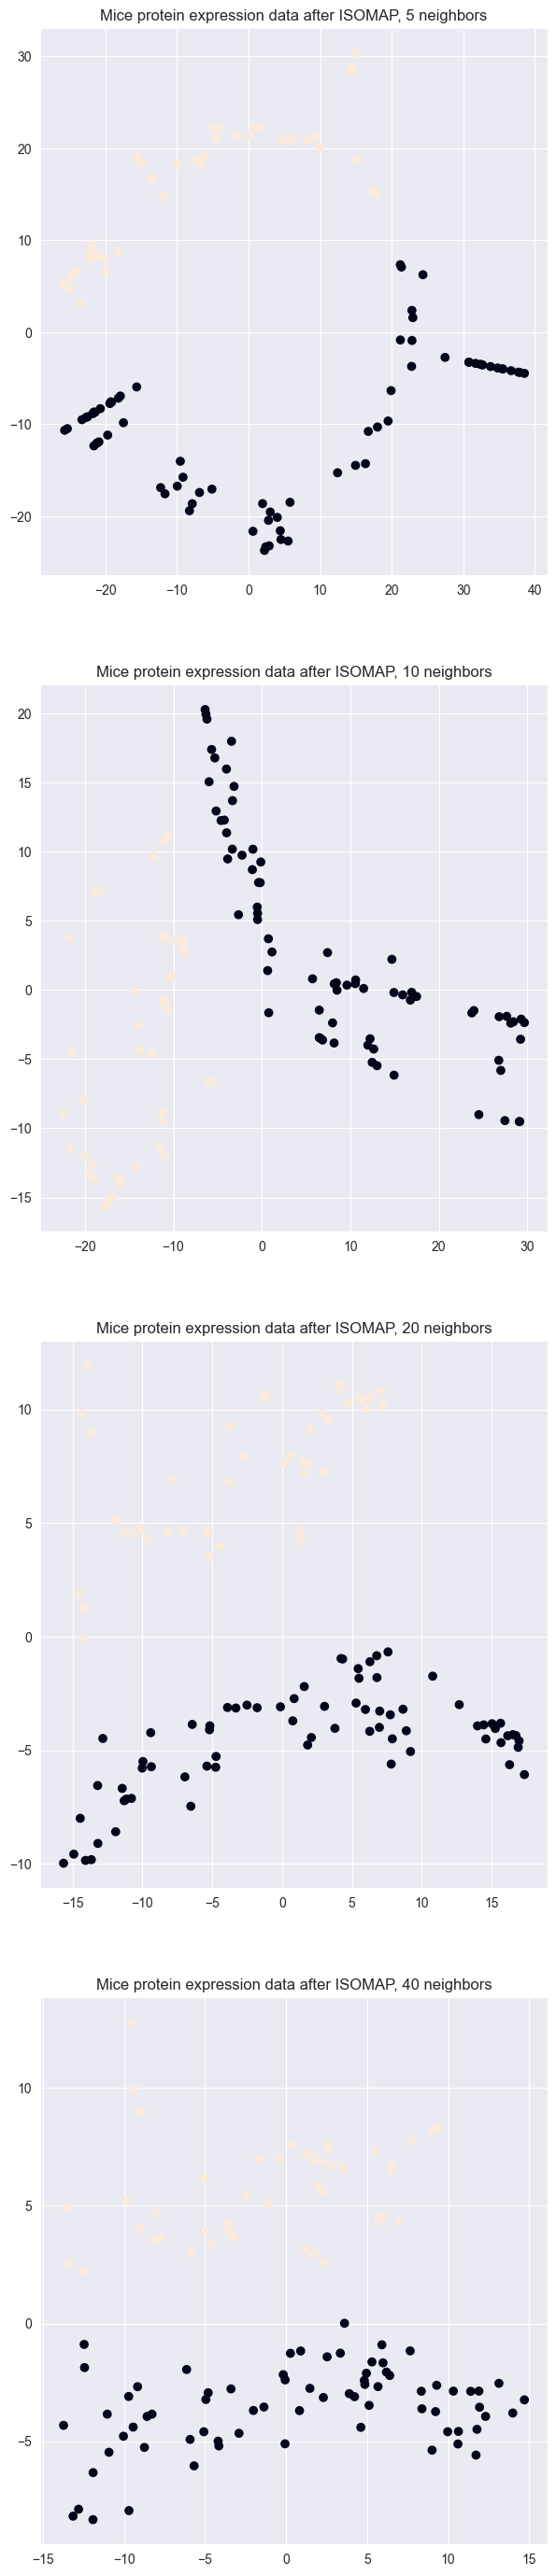

In [37]:
# Produce a corresponding plot with ISOMAP
from sklearn.manifold import Isomap

fig, ax = plt.subplots(4, figsize=(7, 35))
for i, n_neighbors in enumerate([5, 10, 20, 40]):
    iso = Isomap(n_components=2, n_neighbors=n_neighbors)
    df_nuclear_subset_iso = iso.fit_transform(df_nuclear_subset_scaled)

    # Visualize the 2D data set in a scatter plot using different colors for instances from each class
    ax[i].scatter(df_nuclear_subset_iso[:,0], df_nuclear_subset_iso[:,1],
                c=df_nuclear_subset['class'] == 'c-CS-m',
                )
    ax[i].set_title(f'Mice protein expression data after ISOMAP, {n_neighbors} neighbors')

plt.show()


I think all the plots look similar, and separate the data really well

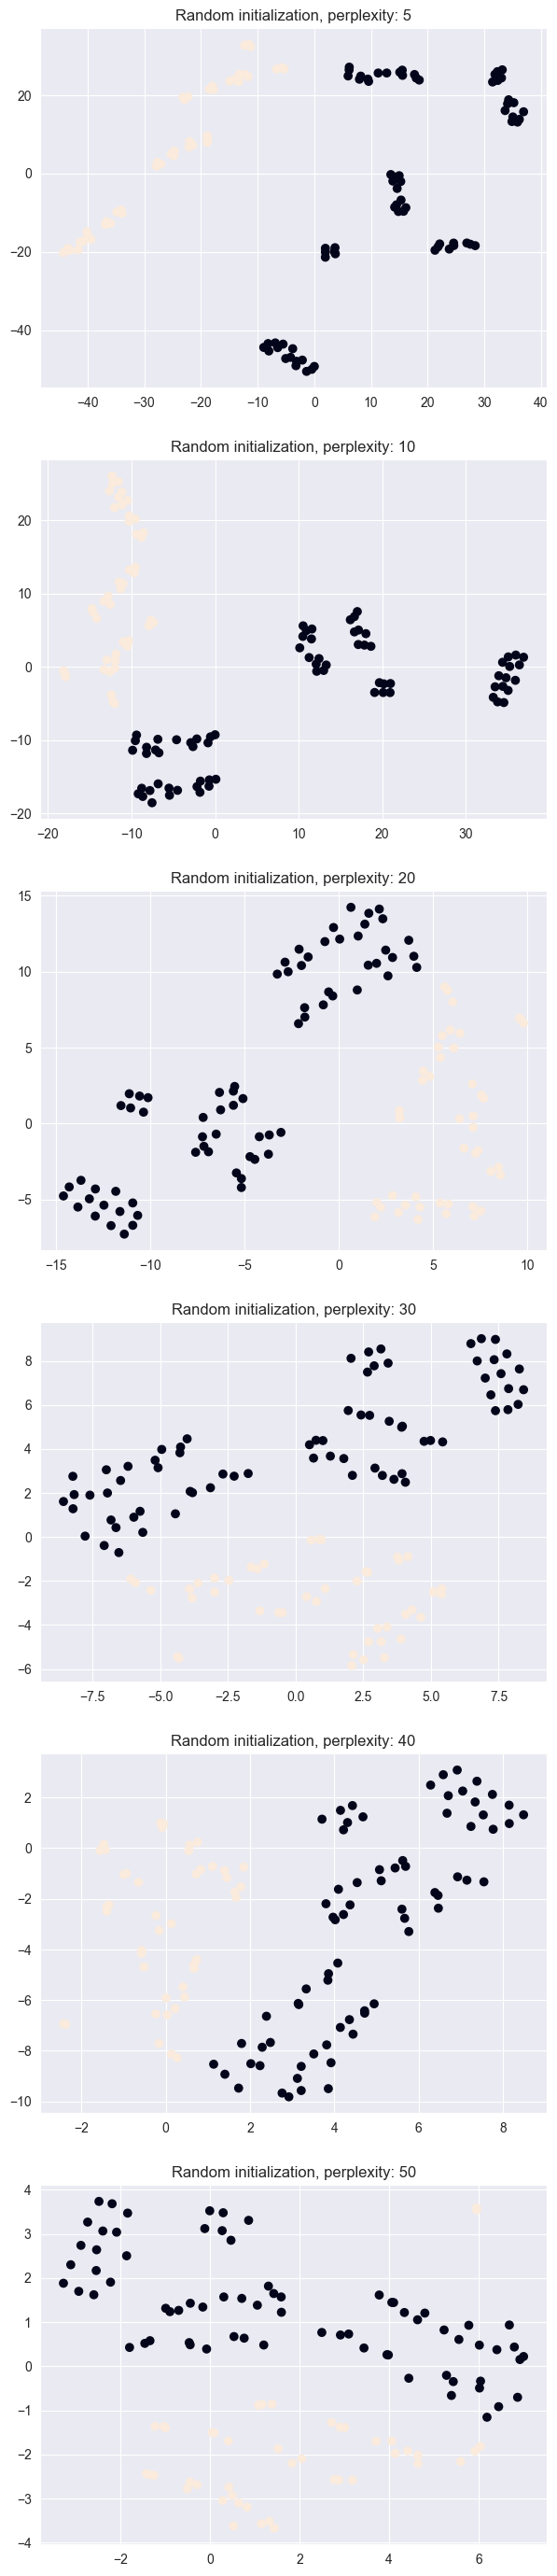

In [38]:
perplexities = [ 5, 10, 20, 30, 40, 50]
fig, ax = plt.subplots(len(perplexities), figsize=(7, 35))

for i, perplexity in enumerate(perplexities):
    # Create a TSNE instance: model
    model = TSNE(perplexity=perplexity, init='random', random_state=0)

    # Apply fit_transform to samples: tsne_features
    tsne_features = model.fit_transform(df_nuclear_subset_scaled)

    # Visualize the 2D data set in a scatter plot using different colors for cases from benign and malignant classes
    ax[i].scatter(tsne_features[:,0], tsne_features[:,1], c=df_nuclear_subset['class'] == 'c-CS-m')
    ax[i].set_title('Random initialization, perplexity: {}'.format(perplexity))

I think PCA, t-SNE and ISOMAP separate the data equally well

# Task 3
# 3.1

Perplexity = 29

![img_1.png](img_1.png)

Perplexity = 30

![img.png](img.png)

The algorithm converged for perplexity = 29, and failed for perlpexity = 30. The reason for this is that the perplexity represents number of close neighbors each point has. The perplexity should be smaller than the number of points in the data set. In this case, the data set has 30 points, and perplexity > 30 - 1 = 29  will cause the algorithm to fail.

# 3.2

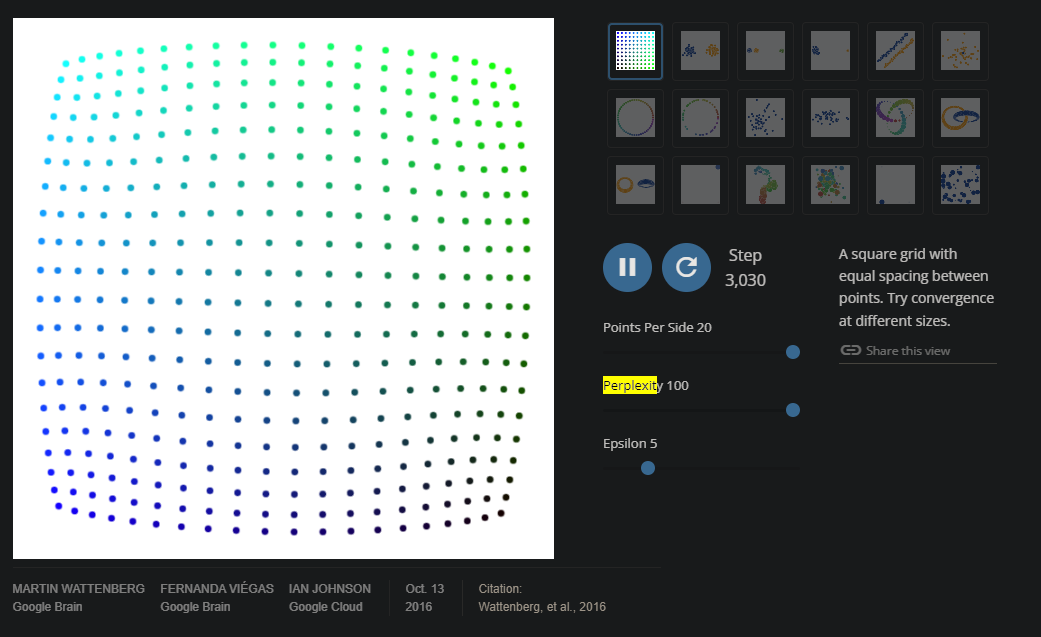

For perplexity 100, each point should have 100 close neighbors. We have 20 points per side, so 400 points total. 100 close neighbors represents 1/4 of the dataset, which is quite large. The points in the center of the square will easily find 100 close neighbors, but the points on the edges will have a hard time finding 100 close neighbors. This will cause the algorithm to make the distance between the points on the edges small, and the distance between the points in the center large. 

# 3.3

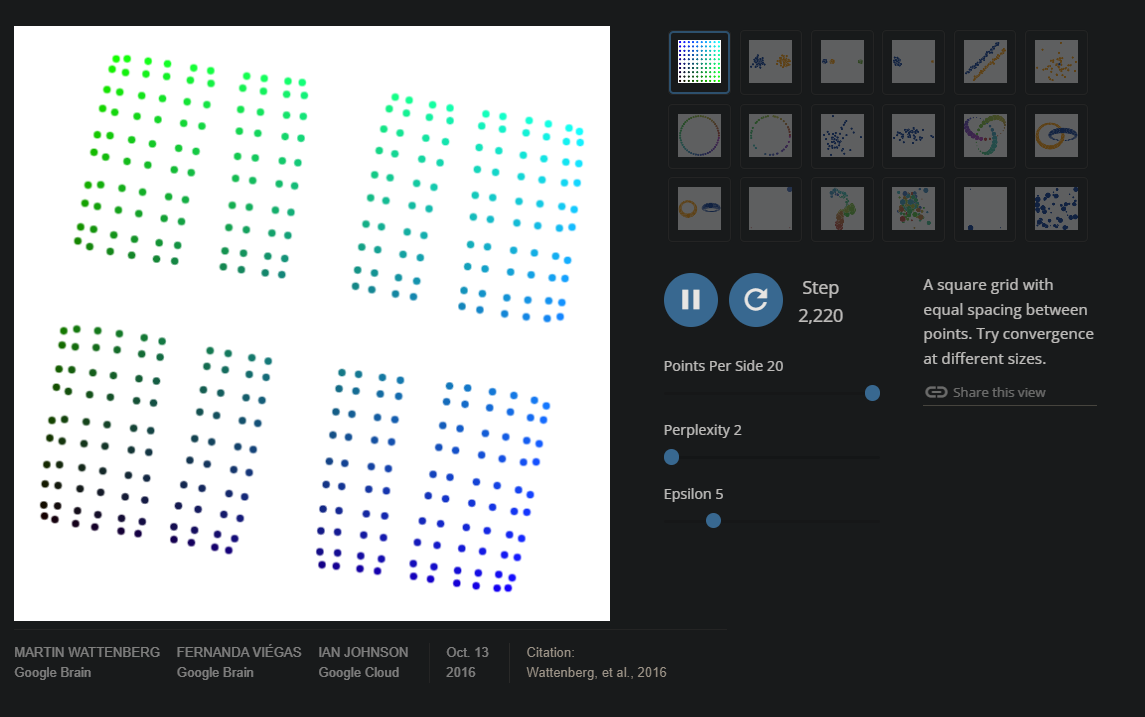

The algorithm breaks the square into small chunks of 4 points. In this configuration, each point will have 2 close neighbors, one located to the top/bottom, one to the left/right. For perplexity 2, this is the only possible stable configuration.

# 3.4

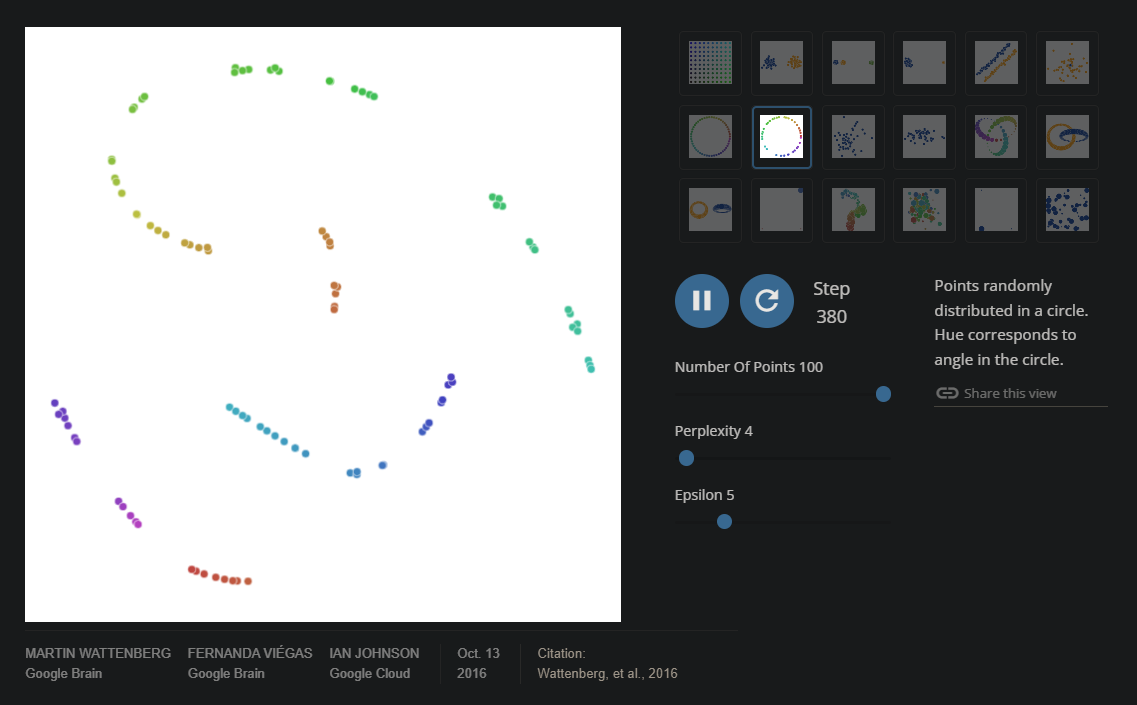

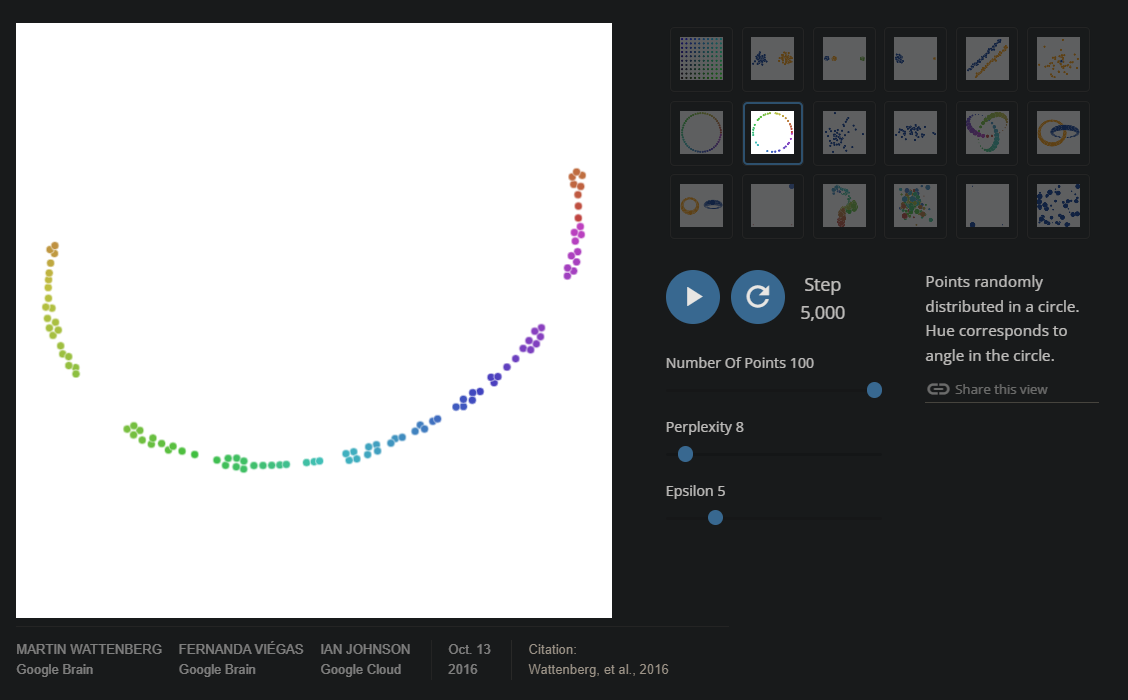

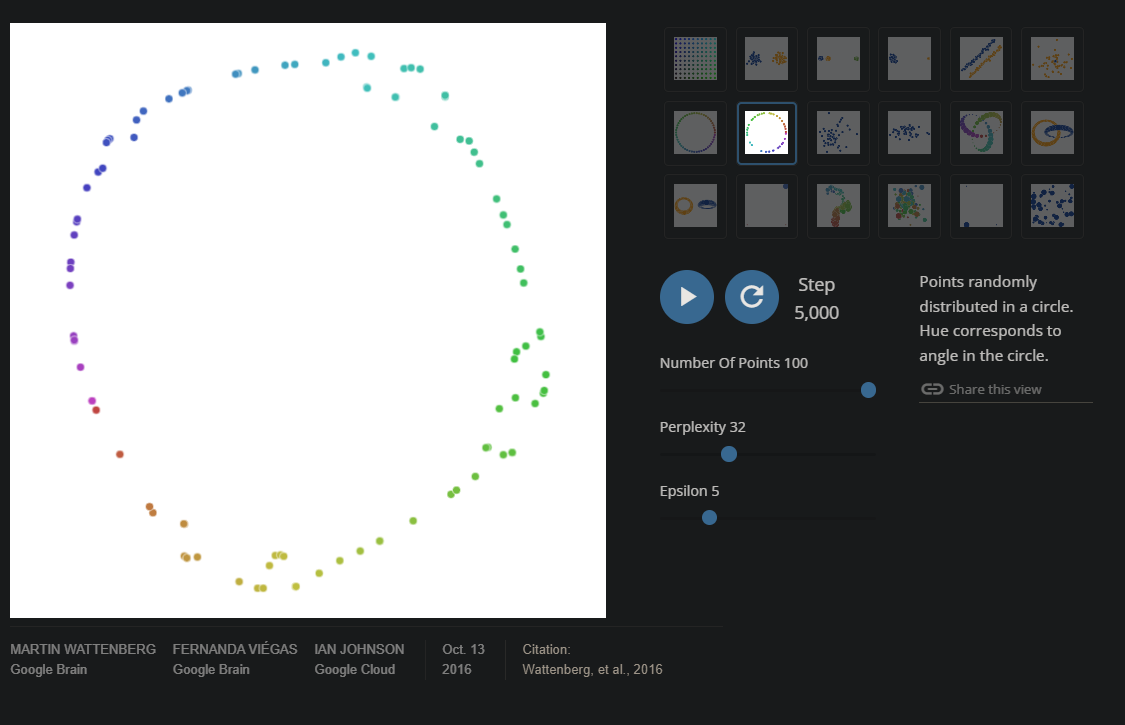

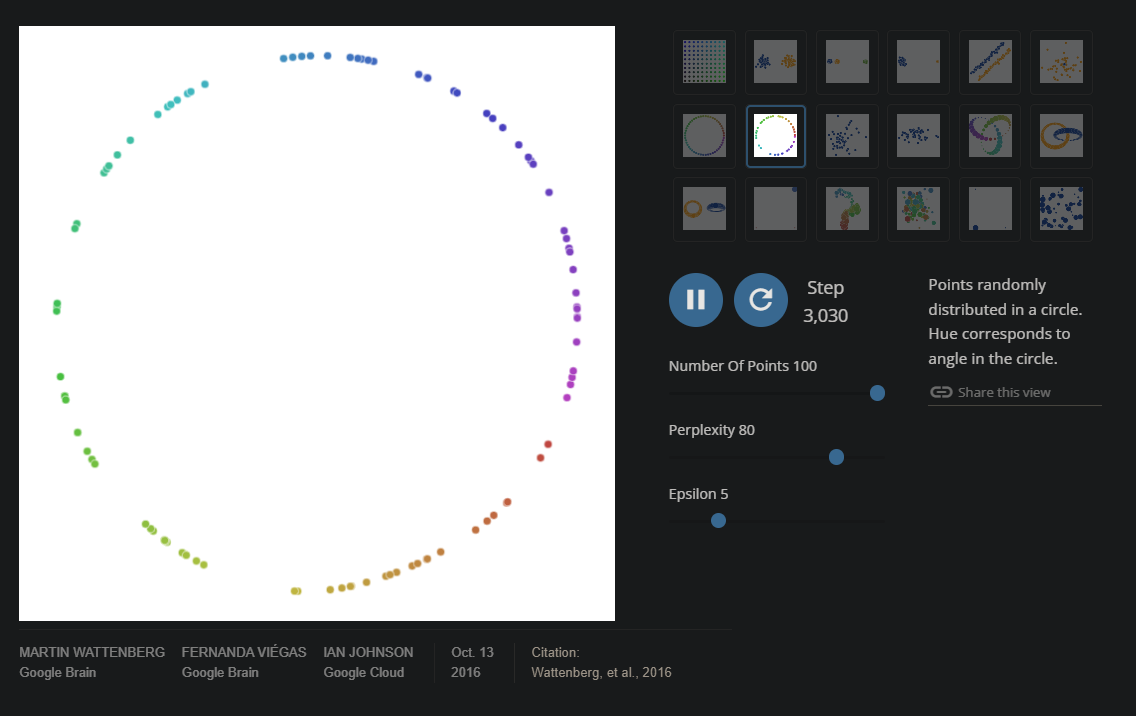

The distribution of points starts resembling a circle for perplexities around 30. For a small perplexity, e.g. 5, the points can simply a chunk of 5 points, and the algorithm will be stuck in a local minimum. High perplexities will force the points to have more neighbors, which will only be possible if the points form a circle-like figure.